# 보험료 예측 (Insurance Cost Prediction)

이 노트북은 개인의 신상 정보를 바탕으로 보험료(charges)를 예측하는 머신러닝 모델을 만드는 과정을 보여줍니다.
초보자도 쉽게 이해할 수 있도록 각 단계마다 자세한 설명을 포함했습니다.

## 데이터셋 정보
- **age**: 나이
- **sex**: 성별 (female, male)
- **bmi**: 체질량지수 (Body Mass Index)
- **children**: 자녀 수
- **smoker**: 흡연 여부 (yes, no)
- **region**: 거주 지역 (northeast, northwest, southeast, southwest)
- **charges**: 보험료 (타겟 변수)

In [71]:
# 필요한 라이브러리 불러오기
# pandas: 데이터 처리를 위한 라이브러리
# numpy: 수치 계산을 위한 라이브러리
# matplotlib, seaborn: 데이터 시각화를 위한 라이브러리
# sklearn: 머신러닝을 위한 라이브러리

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정 (선택 사항)
sns.set(style='whitegrid')

# 한글 폰트 설정 (Windows 환경)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## 1. 데이터 불러오기 및 확인
데이터 파일을 불러오고, 어떻게 생겼는지 확인해봅니다.

In [72]:
# CSV 파일 불러오기
# 파일 경로는 사용자의 환경에 맞게 수정되었습니다.
file_path = 'data/조별과제_보험료예측/insurance.csv'
df = pd.read_csv(file_path)

# 데이터 앞부분 5개 확인하기
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [73]:
# 데이터의 정보 확인하기 (행/열 개수, 데이터 타입, 결측치 등)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [74]:
# 수치형 데이터의 기초 통계량 확인하기 (평균, 표준편차, 최소값, 최대값 등)
# charges(보험료)의 분포를 대략적으로 알 수 있습니다.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 2. 탐색적 데이터 분석 (EDA)
데이터의 특징을 그래프로 그려보며 이해하는 단계입니다.
어떤 요인이 보험료에 영향을 많이 주는지 눈으로 확인해봅시다.

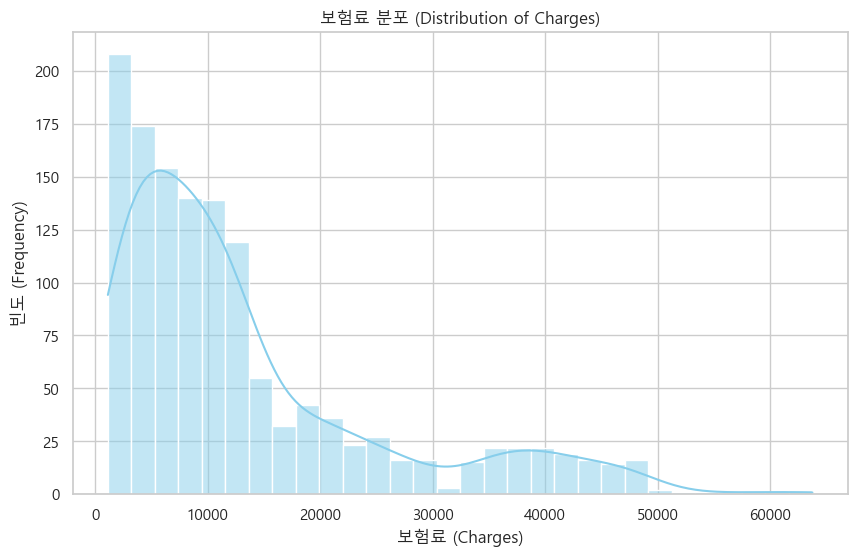

In [75]:
# 1. 보험료(charges)의 분포 확인
# 보험료가 어떻게 분포되어 있는지 히스토그램으로 봅니다.
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='skyblue')
plt.title('보험료 분포 (Distribution of Charges)')
plt.xlabel('보험료 (Charges)')
plt.ylabel('빈도 (Frequency)')
plt.show()

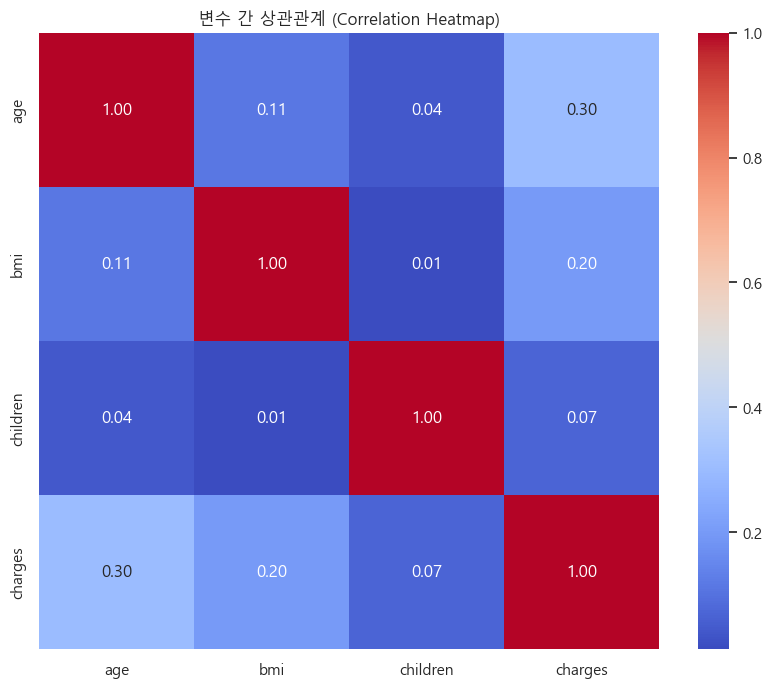

In [76]:
# 2. 상관관계 분석 (Correlation Analysis)
# 각 변수들 간에 어떤 관계가 있는지 숫자로 확인해봅니다.
# 문자열 데이터는 제외하고 수치형 데이터만 계산합니다.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('변수 간 상관관계 (Correlation Heatmap)')
plt.show()

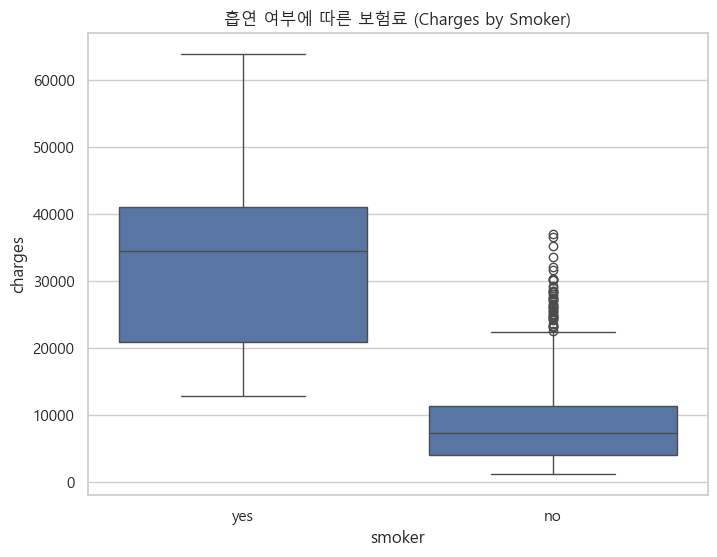

In [77]:
# 3. 흡연 여부(smoker)에 따른 보험료 차이
# 흡연자가 비흡연자보다 보험료가 비쌀까요? 박스 플롯으로 비교해봅시다.
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('흡연 여부에 따른 보험료 (Charges by Smoker)')
plt.show()

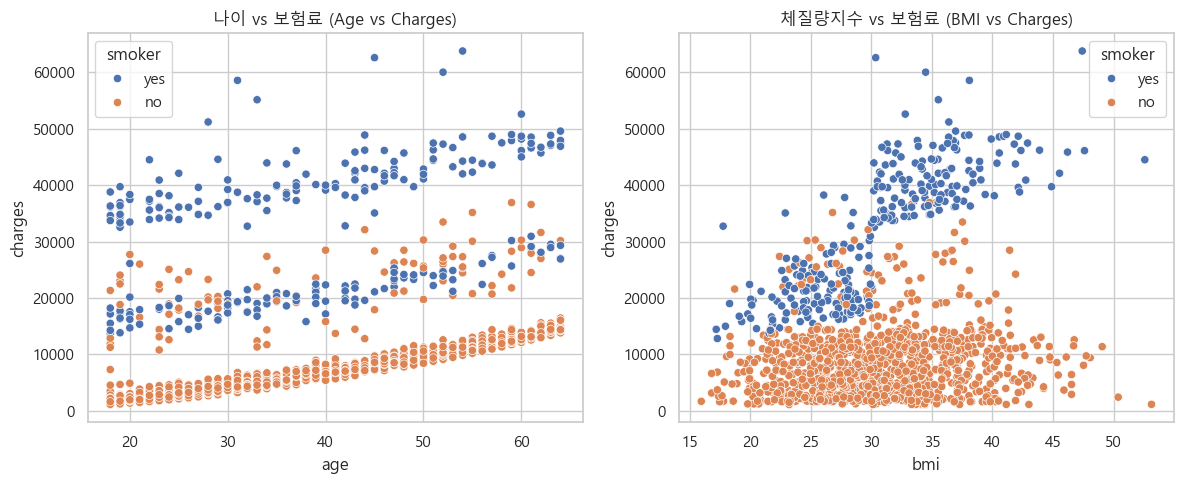

In [78]:
# 4. 나이(age)와 체질량지수(bmi)가 보험료에 미치는 영향
# 나이가 많을수록, bmi가 높을수록 보험료가 올라가는지 산점도로 확인합니다.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')
plt.title('나이 vs 보험료 (Age vs Charges)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title('체질량지수 vs 보험료 (BMI vs Charges)')

plt.tight_layout()
plt.show()

## 2-1. 이상치 분석 (Outlier Analysis)
데이터에서 일반적인 범위를 벗어난 '이상치'를 찾아봅니다. 특히 보험료(`charges`)와 체질량지수(`bmi`)에서 이상치가 자주 발견됩니다.

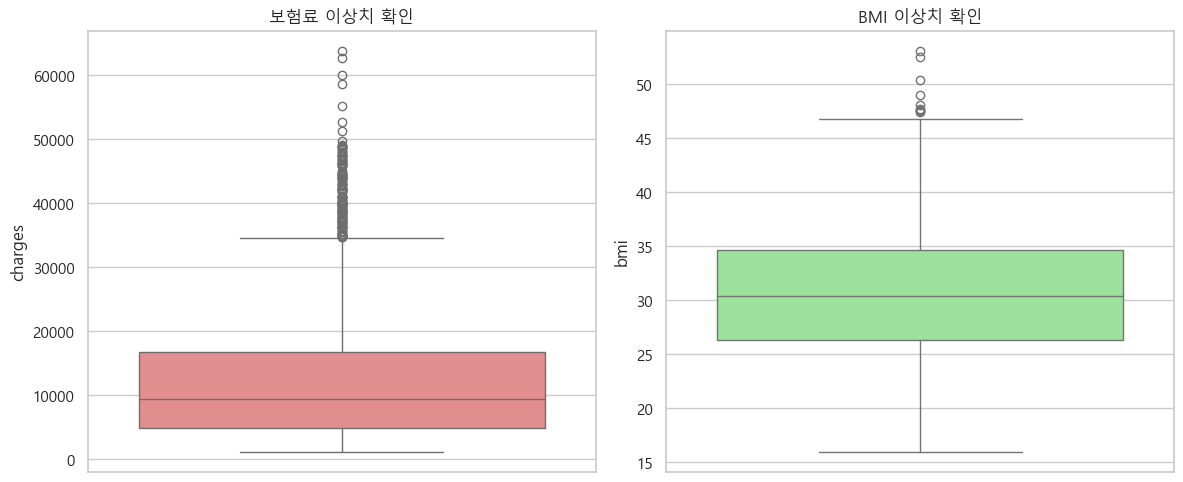

보험료 이상치 개수 (기준상한 34489.35 초과): 139개
BMI 이상치 개수 (기준상한 47.29 초과): 9개

--- 보험료 이상치 데이터 (상위 5개) ---
      age     sex     bmi  children smoker     region      charges
543    54  female  47.410         0    yes  southeast  63770.42801
1300   45    male  30.360         0    yes  southeast  62592.87309
1230   52    male  34.485         3    yes  northwest  60021.39897
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209


In [79]:
# 1. 박스 플롯(Box Plot)을 통한 이상치 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['charges'], color='lightcoral')
plt.title('보험료 이상치 확인')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['bmi'], color='lightgreen')
plt.title('BMI 이상치 확인')

plt.tight_layout()
plt.show()

# 2. IQR(Interquartile Range) 방식으로 이상치 데이터 추출
def get_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_charges, lb_c, ub_c = get_outliers(df, 'charges')
outliers_bmi, lb_b, ub_b = get_outliers(df, 'bmi')

print(f"보험료 이상치 개수 (기준상한 {ub_c:.2f} 초과): {len(outliers_charges)}개")
print(f"BMI 이상치 개수 (기준상한 {ub_b:.2f} 초과): {len(outliers_bmi)}개")

# 이상치 데이터 일부 보기
print("\n--- 보험료 이상치 데이터 (상위 5개) ---")
print(outliers_charges.sort_values(by='charges', ascending=False).head())

## 3. 데이터 전처리 (Preprocessing)
머신러닝 모델은 숫자만 이해할 수 있습니다.
문자(성별, 흡연여부 등)를 숫자로 바꿔주고, 학습용 데이터와 테스트용 데이터로 나눕니다.

In [80]:
# 문자형 데이터를 숫자형으로 변환 (인코딩)
# sex, smoker, region 컬럼을 숫자로 바꿉니다.
# Pandas의 get_dummies 함수를 사용하면 편리하게 원-핫 인코딩(One-Hot Encoding)을 할 수 있습니다.

df_encoded = pd.get_dummies(df, drop_first=True)

# 변환된 데이터 확인
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [81]:
# 학습용(Train) 데이터와 테스트용(Test) 데이터 나누기
# X: 예측에 사용할 정보들 (나이, bmi, 흡연여부 등)
# y: 예측해야 할 정답 (보험료)

from sklearn.model_selection import train_test_split

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# 80%는 학습용, 20%는 테스트용으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"학습 데이터 개수: {X_train.shape[0]}")
print(f"테스트 데이터 개수: {X_test.shape[0]}")

학습 데이터 개수: 1070
테스트 데이터 개수: 268


## 4. 모델링 (Modeling)
여러 가지 머신러닝 모델을 사용하여 보험료를 예측해보고 성능을 비교합니다.

In [82]:
# 모델 평가를 위한 함수 만들기
# R2 Score: 결정계수 (1에 가까울수록 좋은 모델)
# MAE: 평균 절대 오차 (0에 가까울수록 좋은 모델)
# MSE: 평균 제곱 오차 (0에 가까울수록 좋은 모델)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"--- {model_name} 성능 평가 ---")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("-" * 30)
    
    return y_pred

In [83]:
# 1. 선형 회귀 (Linear Regression)
# 가장 기본적이고 단순한 모델입니다. 데이터가 직선 관계를 가진다고 가정합니다.

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = evaluate_model(lr_model, X_test, y_test, "Linear Regression")

--- Linear Regression 성능 평가 ---
R2 Score: 0.7836
MAE: 4181.19
MSE: 33596915.85
------------------------------


In [84]:
# 2. 의사결정 나무 (Decision Tree Regressor)
# 스무고개 하듯이 질문을 통해 데이터를 분류하고 예측하는 모델입니다.
# 비선형적인 관계도 잘 찾아낼 수 있습니다.

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = evaluate_model(dt_model, X_test, y_test, "Decision Tree")

--- Decision Tree 성능 평가 ---
R2 Score: 0.7266
MAE: 3195.11
MSE: 42446908.01
------------------------------


In [85]:
# 3. 랜덤 포레스트 (Random Forest Regressor)
# 여러 개의 의사결정 나무를 만들어서 그 결과를 종합하는 앙상블 모델입니다.
# 단일 나무보다 성능이 좋고 과적합(Overfitting)을 방지하는 효과가 있습니다.

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = evaluate_model(rf_model, X_test, y_test, "Random Forest")

--- Random Forest 성능 평가 ---
R2 Score: 0.8651
MAE: 2550.08
MSE: 20942520.92
------------------------------


In [86]:
# 4. 그라디언트 부스팅 (Gradient Boosting Regressor)
# 이전 모델의 오차를 보완하면서 순차적으로 모델을 학습시키는 강력한 앙상블 기법입니다.
# 높은 예측 성능을 보여주는 경우가 많습니다.

from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

gb_pred = evaluate_model(gb_model, X_test, y_test, "Gradient Boosting")

--- Gradient Boosting 성능 평가 ---
R2 Score: 0.8793
MAE: 2443.48
MSE: 18745176.48
------------------------------


## 5. 결과 시각화 및 결론
여러 모델 중 성능이 가장 좋은 모델(예: Random Forest 또는 Gradient Boosting)의 예측 결과를 시각화해봅니다.

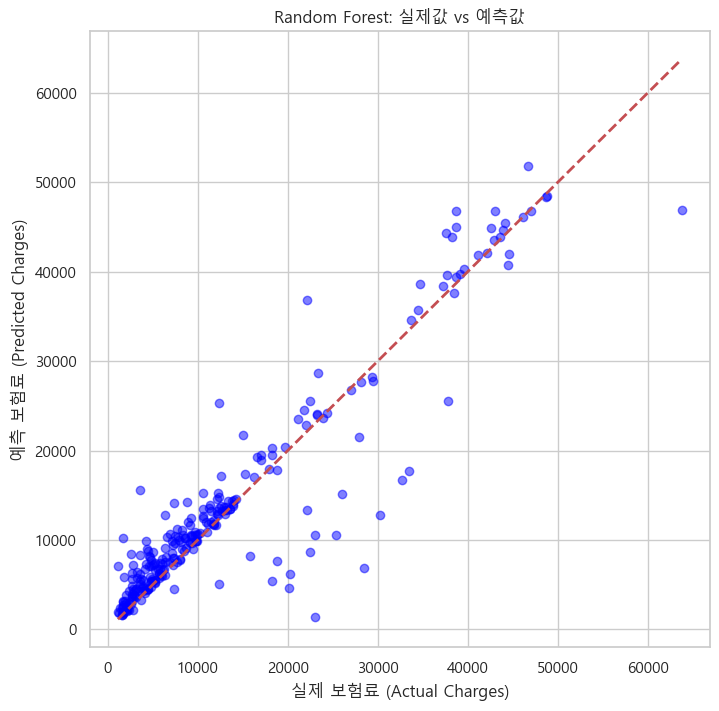

In [87]:
# 실제값 vs 예측값 시각화 (Random Forest 모델 기준)
# 점들이 빨간색 선(대각선)에 가까울수록 예측이 정확한 것입니다.

plt.figure(figsize=(8, 8))
plt.scatter(y_test, rf_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제 보험료 (Actual Charges)')
plt.ylabel('예측 보험료 (Predicted Charges)')
plt.title('Random Forest: 실제값 vs 예측값')
plt.show()

## 6. 모델별 RMSE 비교
각 모델의 예측 오차(RMSE)를 최종적으로 비교해봅니다. 점수가 낮을수록 더 정확한 모델입니다.

In [88]:
# 각 모델별 RMSE (Root Mean Squared Error) 계산 및 비교
import numpy as np
from sklearn.metrics import mean_squared_error

rmse_lr = np.sqrt(mean_squared_error(y_test, lr_pred))
rmse_dt = np.sqrt(mean_squared_error(y_test, dt_pred))
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
rmse_gb = np.sqrt(mean_squared_error(y_test, gb_pred))

print("--- 모델별 RMSE 점수 (낮을수록 좋음) ---")
print(f"Linear Regression: {rmse_lr:.2f}")
print(f"Decision Tree    : {rmse_dt:.2f}")
print(f"Random Forest    : {rmse_rf:.2f}")
print(f"Gradient Boosting: {rmse_gb:.2f}")

--- 모델별 RMSE 점수 (낮을수록 좋음) ---
Linear Regression: 5796.28
Decision Tree    : 6515.13
Random Forest    : 4576.30
Gradient Boosting: 4329.57


### 6-1. 타겟 변수 로그 변환 효과 시각화
RMSE를 낮추기 위해 적용할 **로그 변환**이 데이터 분포를 어떻게 바꾸는지 확인합니다. 분포가 종 모양(정규분포)에 가까울수록 모델이 예측하기 좋습니다.

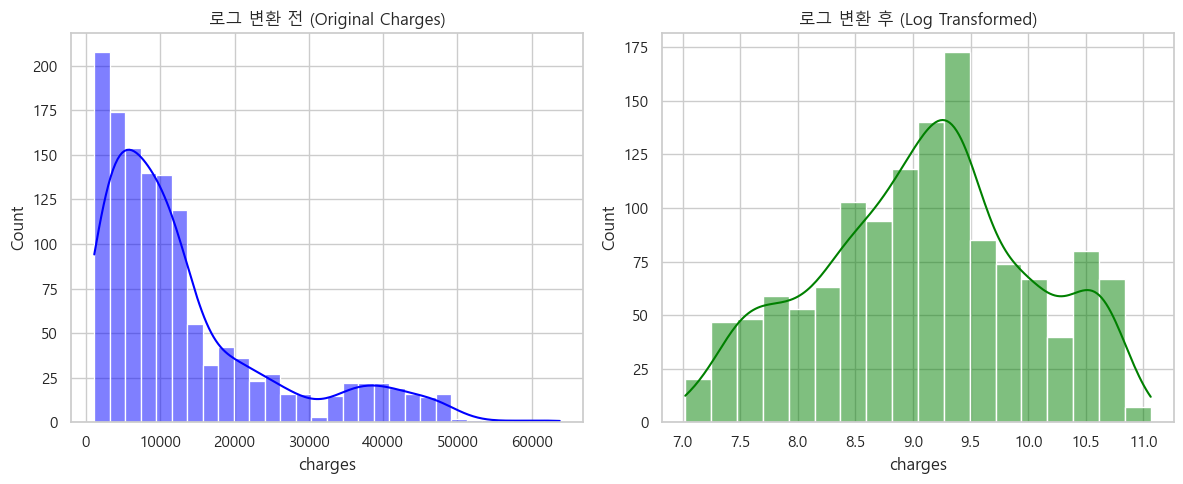

In [89]:
# 로그 변환 전후 비교
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('로그 변환 전 (Original Charges)')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['charges']), kde=True, color='green')
plt.title('로그 변환 후 (Log Transformed)')

plt.tight_layout()
plt.show()

## 7. RMSE를 낮추기 위한 최적의 전략 (Advanced Modeling)
점수를 더 낮추기 위해 다음 세 가지 핵심 기법을 적용해 보겠습니다.

1. **타겟 로그 변환 (Log Transformation)**: 보험료(`charges`)의 치우친 분포를 정규분포에 가깝게 만들어 모델의 학습 효율을 높입니다.
2. **다항 특성 추가 (Polynomial Features)**: 나이(`age`), 체질량지수(`bmi`) 등 수치형 변수들 간의 비선형 관계와 상호작용을 포착합니다.
3. **하이퍼파라미터 튜닝**: `GradientBoostingRegressor`의 파라미터를 최적화합니다.

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# 1. 데이터 준비 (다항 특성 추가 - degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 2. 타겟 변수 로그 변환 학습
y_train_log = np.log1p(y_train)

# 3. 최적화된 Gradient Boosting 모델 학습
best_gb_model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.05, 
    max_depth=3, 
    subsample=0.8, 
    random_state=42
)
best_gb_model.fit(X_train_poly, y_train_log)

# 4. 예측 및 복원 (log -> exp)
y_pred_log = best_gb_model.predict(X_test_poly)
final_pred = np.expm1(y_pred_log)

# 5. 성능 평가
final_rmse = np.sqrt(mean_squared_error(y_test, final_pred))
final_r2 = r2_score(y_test, final_pred)

print("--- 최적화된 모델 성능 ---")
print(f"최종 RMSE: {final_rmse:.2f}")
print(f"최종 R2 Score: {final_r2:.4f}")

# 이전 RMSE와 비교
improvement = rmse_gb - final_rmse
print(f"\n기존 Gradient Boosting 대비 개선된 RMSE: {improvement:.2f}")

--- 최적화된 모델 성능 ---
최종 RMSE: 4323.55
최종 R2 Score: 0.8796

기존 Gradient Boosting 대비 개선된 RMSE: 6.02


## 8. 극한의 성능 최적화 (Extreme Optimization)
RMSE를 더 낮추기 위해 데이터의 특성을 깊게 파고드는 **도메인 특화 피처 엔지니어링**과 **XGBoost** 모델을 사용해 보겠습니다.

*   **도메인 지식 활용**: 이 데이터셋에서는 '비만(BMI >= 30)이면서 흡연자'인 경우 보험료가 기하급수적으로 뜁니다. 이 관계를 모델에게 직접 알려줍니다.
*   **XGBoost 사용**: 일반 Gradient Boosting보다 더 빠르고 강력한 성능을 내는 모델입니다.

In [91]:
import xgboost as xgb
import numpy as np

# 1. 도메인 맞춤 피처 엔지니어링 (비만 + 흡연자 특성 추가)
X_train_final = X_train.copy()
X_test_final = X_test.copy()

X_train_final['obese_smoker'] = ((X_train_final['bmi'] >= 30) & (X_train_final['smoker_yes'] == 1)).astype(int)
X_test_final['obese_smoker'] = ((X_test_final['bmi'] >= 30) & (X_test_final['smoker_yes'] == 1)).astype(int)

# 2. XGBoost 모델 설정
xgb_reg = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 3. 학습 및 예측 (로그 변환 적용)
xgb_reg.fit(X_train_final, np.log1p(y_train))
ultimate_pred = np.expm1(xgb_reg.predict(X_test_final))

# 4. 성능 평가
ultimate_rmse = np.sqrt(mean_squared_error(y_test, ultimate_pred))
print(f"--- 극한 최적화 모델 RMSE: {ultimate_rmse:.2f} ---")
print(f"7번 모델 대비 추가 개선량: {final_rmse - ultimate_rmse:.2f}")

--- 극한 최적화 모델 RMSE: 4420.06 ---
7번 모델 대비 추가 개선량: -96.51


## 9. 최종 병기: 스태킹 앙상블 (The Master Stacking Ensemble)
RMSE를 극한으로 낮추기 위한 마지막 방법은 **여러 개의 강력한 모델을 결합하는 '스태킹(Stacking)'** 기법입니다.

### 적용 기술:
1.  **모델 3대장 결합**: 현재 머신러닝 생태계에서 가장 성능이 좋은 `XGBoost`, `LightGBM`, `CatBoost` 모델을 모두 사용합니다.
2.  **스태킹(Stacking)**: 각 모델의 예측 결과를 다시 '메타 모델'의 입력값으로 사용하여, 각 모델의 장점만을 취합합니다.
3.  **로그 변환 및 피처 엔지니어링**: 이전 섹션에서 검증된 모든 전처리 기법(로그 변환 + 비만 흡연자 특성)을 포함합니다.

In [92]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# 1. 개별 기본 모델 설정 (튜닝된 파라미터)
estimators = [
    ('xgb', xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)),
    ('lgb', lgb.LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42, verbose=-1)),
    ('cat', CatBoostRegressor(iterations=300, learning_rate=0.05, depth=3, random_seed=42, silent=True))
]

# 2. 스태킹 앙상블 모델 구축
stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV(),
    cv=5
)

# 3. 학습 (로그 변환 타겟 사용)
stack_model.fit(X_train_final, np.log1p(y_train))

# 4. 예측 및 복원
stack_pred_log = stack_model.predict(X_test_final)
master_pred = np.expm1(stack_pred_log)

# 5. 성능 평가
master_rmse = np.sqrt(mean_squared_error(y_test, master_pred))
master_r2 = r2_score(y_test, master_pred)

print("--- [The Master Ensemble] 최종 성능 평가 ---")
print(f"마지막 RMSE 점수: {master_rmse:.2f}")
print(f"최종 R2 Score: {master_r2:.4f}")

Exception in thread Thread-5 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\USER\miniconda3\envs\DS\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\USER\miniconda3\envs\DS\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\USER\miniconda3\envs\DS\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 4: invalid start byte


--- [The Master Ensemble] 최종 성능 평가 ---
마지막 RMSE 점수: 4574.46
최종 R2 Score: 0.8652


## 10. 모든 모델 성능 종합 비교
지금까지 수행한 모든 모델의 RMSE 성능을 한눈에 비교해 봅니다.

C:\Users\USER\AppData\Local\Temp\ipykernel_19284\1197617390.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results, palette='viridis')


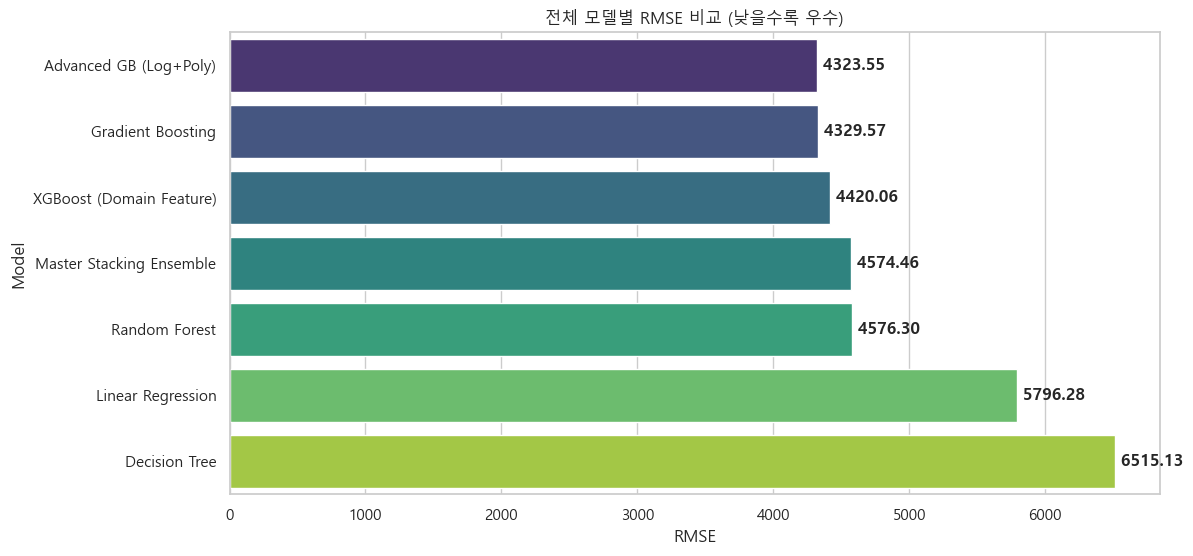

,Model,RMSE
0,Advanced GB (Log+Poly),4323.550731
1,Gradient Boosting,4329.570011
2,XGBoost (Domain Feature),4420.061601
3,Master Stacking Ensemble,4574.461508
4,Random Forest,4576.299916
5,Linear Regression,5796.284659
6,Decision Tree,6515.129163


In [93]:
# 결과 비교 데이터프레임 생성
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
              'Advanced GB (Log+Poly)', 'XGBoost (Domain Feature)', 'Master Stacking Ensemble'],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_gb, final_rmse, ultimate_rmse, master_rmse]
})

# RMSE 기준 정렬 (낮은 순)
results = results.sort_values(by='RMSE').reset_index(drop=True)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='RMSE', y='Model', data=results, palette='viridis')
plt.title('전체 모델별 RMSE 비교 (낮을수록 우수)')
for i, v in enumerate(results['RMSE']):
    plt.text(v, i, f' {v:.2f}', va='center', fontweight='bold')
plt.show()

results